In [73]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [74]:
df=pd.read_csv('AAPL.csv')

### Visualizing First 5 row of the dataset

In [75]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-05-21,8.315000,8.732143,8.262500,8.654286,7.316792,1223891200
1,2010-05-24,8.831429,8.960714,8.795000,8.812857,7.450853,754238800
2,2010-05-25,8.548214,8.812857,8.470000,8.757857,7.404354,1048006400
3,2010-05-26,8.931429,9.004643,8.705357,8.718214,7.370838,850654000
4,2010-05-27,8.950000,9.067500,8.896786,9.048214,7.649839,666282400


### Visualizing the last 5 row of the dataset

In [76]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3519,2024-05-15,187.910004,190.649994,187.369995,189.720001,189.720001,70400000
3520,2024-05-16,190.470001,191.100006,189.660004,189.839996,189.839996,52845200
3521,2024-05-17,189.509995,190.809998,189.179993,189.869995,189.869995,41282900
3522,2024-05-20,189.330002,191.919998,189.009995,191.039993,191.039993,44323200
3523,2024-05-21,191.089996,192.649902,190.920105,192.054993,192.054993,17758809


In [77]:
df1=df.reset_index()['Close']
df1

0         8.654286
1         8.812857
2         8.757857
3         8.718214
4         9.048214
           ...    
3519    189.720001
3520    189.839996
3521    189.869995
3522    191.039993
3523    192.054993
Name: Close, Length: 3524, dtype: float64

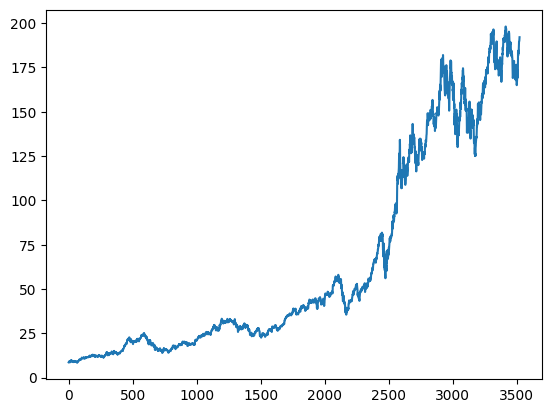

In [78]:
import matplotlib.pyplot as plt
plt.plot(df1)

### Applying MinMax scaler 

In [79]:
df1

0         8.654286
1         8.812857
2         8.757857
3         8.718214
4         9.048214
           ...    
3519    189.720001
3520    189.839996
3521    189.869995
3522    191.039993
3523    192.054993
Name: Close, Length: 3524, dtype: float64

In [80]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [81]:
df1.shape

(3524, 1)

In [82]:
print(df1)

[[4.50335113e-04]
 [1.28694007e-03]
 [9.96765493e-04]
 ...
 [9.56526541e-01]
 [9.62699335e-01]
 [9.68054375e-01]]


In [83]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.60)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [84]:
training_size,test_size

(2114, 1410)

In [85]:
train_data

array([[0.00045034],
       [0.00128694],
       [0.00099677],
       ...,
       [0.25402711],
       [0.24016468],
       [0.23764543]])

In [86]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [87]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [88]:
print(X_train.shape), print(y_train.shape)

(2013, 100)
(2013,)


(None, None)

In [89]:
print(X_test.shape), print(ytest.shape)

(1309, 100)
(1309,)


(None, None)

In [90]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [91]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Create the optimized LSTM model
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(100, 1)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(LSTM(100, return_sequences=True))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(50, activation='relu'))
model.add(Dense(1))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer=optimizer)


c:\anaconda\envs\VISION\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [92]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                   │ (None, 100, 100)       │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 100, 100)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 100, 100)       │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 100, 100)       │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100, 100)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 100, 100)       │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 100)            │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 207,901 (812.11 KB)

 Trainable params: 207,301 (809.77 KB)

 Non-trainable params: 600 (2.34 KB)

In [93]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 229ms/step - loss: 0.4544 - val_loss: 0.2356
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 206ms/step - loss: 0.1058 - val_loss: 0.4120
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 210ms/step - loss: 0.0708 - val_loss: 0.4459
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 239ms/step - loss: 0.0407 - val_loss: 0.4008
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 234ms/step - loss: 0.0345 - val_loss: 0.4166
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 225ms/step - loss: 0.0256 - val_loss: 0.3102
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 208ms/step - loss: 0.0236 - val_loss: 0.2888
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 230ms/step - loss: 0.0196 - val_loss: 0.3044
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 223ms/step - loss: 0.0140 - val_loss: 0.2663
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 210ms/step - loss: 0.0128 - val_loss: 0.2963
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 207ms/step - loss: 0.0113 - val_loss: 0.1812
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 

In [94]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step


In [95]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [96]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

24.012778158637875

In [97]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

60.68180371030348

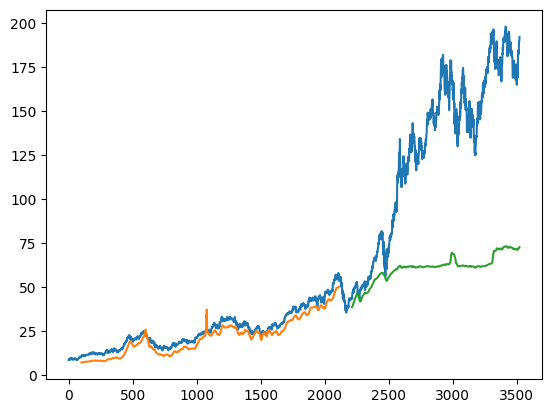

In [98]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [99]:
len(test_data)

1410

In [100]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 1069)

In [101]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [102]:
temp_input

[0.34808323232444316,
 0.3347615761084225,
 0.3407892986908927,
 0.31555729514920117,
 0.3153462538188029,
 0.34891419206492613,
 0.33639713191028053,
 0.35409775987760583,
 0.34114544841236305,
 0.33601461850970216,
 0.3058628580511563,
 0.33114759422696516,
 0.3180765433256598,
 0.28220041933708173,
 0.32142675124260145,
 0.27426020361433845,
 0.2883072804399882,
 0.28014282308163796,
 0.27764995968789286,
 0.2571530881707791,
 0.25072966771022587,
 0.2804198131790665,
 0.2786260067158426,
 0.2956671681164702,
 0.28155413197198753,
 0.29087927707826833,
 0.2901934046252519,
 0.27254553039564955,
 0.27784779543718097,
 0.27320501806595243,
 0.3009826334632105,
 0.296972937875966,
 0.3057309552411943,
 0.3082633667915521,
 0.31520118763494176,
 0.3334030315075984,
 0.3299473213911125,
 0.3329282214885858,
 0.32779738631002353,
 0.3200550063365686,
 0.3087645826968838,
 0.31896027790747117,
 0.3175489637412201,
 0.3280216279456307,
 0.3282854388414559,
 0.32223131037266683,
 0.334299966

In [108]:
from numpy import array

lst_output = []
n_steps = 100
i = 0

# Ensure temp_input has the correct initial length
temp_input = temp_input[-n_steps:]

while i < 60:
    if len(temp_input) > n_steps:
        x_input = np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = np.array(temp_input)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1

print(lst_output)


[0.22464234]
1 day input [0.93104393 0.92634838 0.92481841 0.91664074 0.91268382 0.91669355
 0.92750908 0.91774871 0.91057349 0.91832907 0.91194519 0.90841035
 0.90265964 0.87860154 0.85232749 0.84705159 0.84641851 0.85554579
 0.86620314 0.86873555 0.8576562  0.86752211 0.86551724 0.87132077
 0.8837719  0.89743646 0.85892237 0.86372346 0.85617896 0.85016443
 0.86915763 0.85950272 0.85185268 0.84557434 0.84984781 0.84546888
 0.84947854 0.84351674 0.84995335 0.8399819  0.87828491 0.88625158
 0.86588659 0.84842337 0.8411426  0.8360777  0.8253149  0.82974664
 0.83533908 0.84652405 0.85111405 0.84800129 0.87016006 0.85343547
 0.84800129 0.86768038 0.92228599 0.91347525 0.91711555 0.91890942
 0.92856433 0.92054494 0.93758608 0.94365333 0.95573519 0.95636827
 0.95652654 0.96269934 0.96805438 0.33898458 0.33227113 0.32190183
 0.31040847 0.29859579 0.28733239 0.27724221 0.26955986 0.26825747
 0.26753917 0.26727965 0.26729402 0.2672514  0.26685804 0.26609018
 0.26497912 0.26344943 0.26137897 0.2

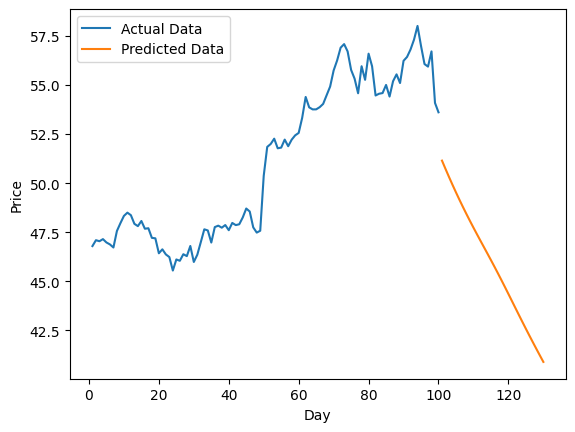

In [111]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure lst_output contains exactly 30 elements
lst_output = np.array(lst_output[:30]).reshape(-1, 1)
lst_output_inverse = scaler.inverse_transform(lst_output).flatten()

# Indices for the last 100 points in the training set
start_index = training_size - 100
end_index = training_size

# Extract the last 100 points for plotting day_new
plot_data = df1[start_index:end_index]

# Inverse transform the plot_data
plot_data_inverse = scaler.inverse_transform(plot_data)

# Plot the actual data and the predictions
plt.plot(day_new, plot_data_inverse, label='Actual Data')
plt.plot(day_pred, lst_output_inverse, label='Predicted Data')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.show()


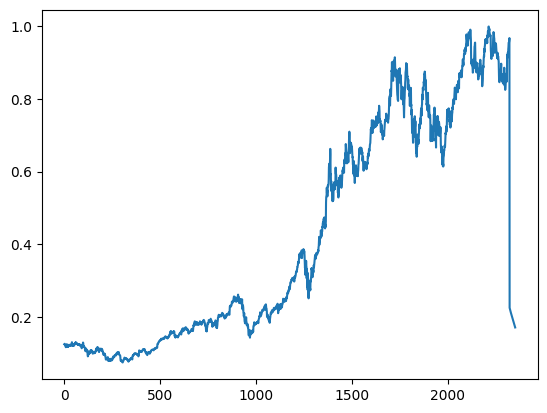

In [114]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])